Load Libraries & Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# display settings
pd.set_option("display.max_columns", None)
sns.set(style="darkgrid")

# load dataset
df = pd.read_csv("../data/raw/complaints.csv")  # adjust filename if needed

# quick look
df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_9376\3821411863.py:12: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")  # adjust filename if needed


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


Understand Dataset Structure

In [5]:
# shape of dataset
df.shape

(9609797, 18)

In [7]:
# column names and types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [8]:
# basic statistics
df.describe(include="object")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
count,9609797,9609797,9374502,9609791,8770275,2980756,4839590,9609797,9555281,9579569,628768,7960236,9609797,9609797,9609777,9609797,768299
unique,4952,21,86,178,272,2108758,11,7674,63,34965,3,4,7,4901,8,2,2
top,2025-01-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2025-02-25,Closed with explanation,Yes,No
freq,34093,4834855,6955847,3613761,2324057,21622,4537468,2321626,1273171,172807,391563,4639279,9017914,32525,5487712,9535859,619921


Initial Data Quality Check

In [9]:
# missing values per column
df.isna().sum().sort_values(ascending=False)


Tags                            8981029
Consumer disputed?              8841498
Consumer complaint narrative    6629041
Company public response         4770207
Consumer consent provided?      1649561
Sub-issue                        839522
Sub-product                      235295
State                             54516
ZIP code                          30228
Company response to consumer         20
Issue                                 6
Date received                         0
Product                               0
Company                               0
Date sent to company                  0
Submitted via                         0
Timely response?                      0
Complaint ID                          0
dtype: int64

Complaint Distribution by Product

In [10]:
product_counts = df["Product"].value_counts()

product_counts


Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

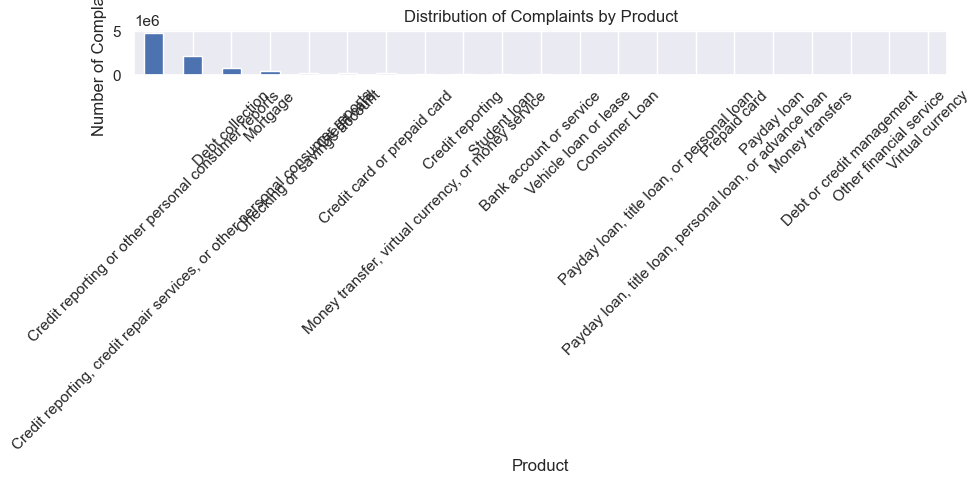

In [11]:
plt.figure(figsize=(10, 5))
product_counts.plot(kind="bar")
plt.title("Distribution of Complaints by Product")
plt.xlabel("Product")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Narrative Presence: With vs Without Text

In [12]:
has_narrative = df["Consumer complaint narrative"].notna().sum()
no_narrative = df["Consumer complaint narrative"].isna().sum()

has_narrative, no_narrative


(np.int64(2980756), np.int64(6629041))

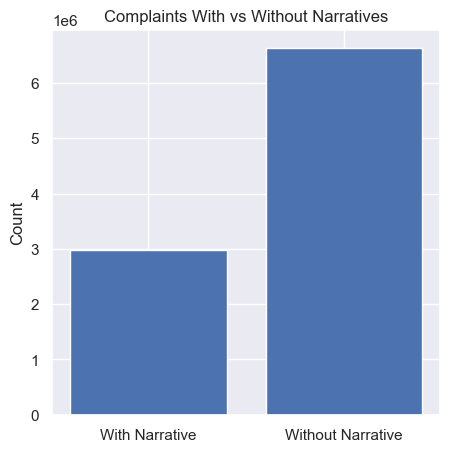

In [13]:
plt.figure(figsize=(5, 5))
plt.bar(["With Narrative", "Without Narrative"], [has_narrative, no_narrative])
plt.title("Complaints With vs Without Narratives")
plt.ylabel("Count")
plt.show()


Narrative Length Analysis (Word Count)

In [14]:
# create word count column
df["word_count"] = (
    df["Consumer complaint narrative"]
    .fillna("")
    .apply(lambda x: len(x.split()))
)

df["word_count"].describe()


count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: word_count, dtype: float64

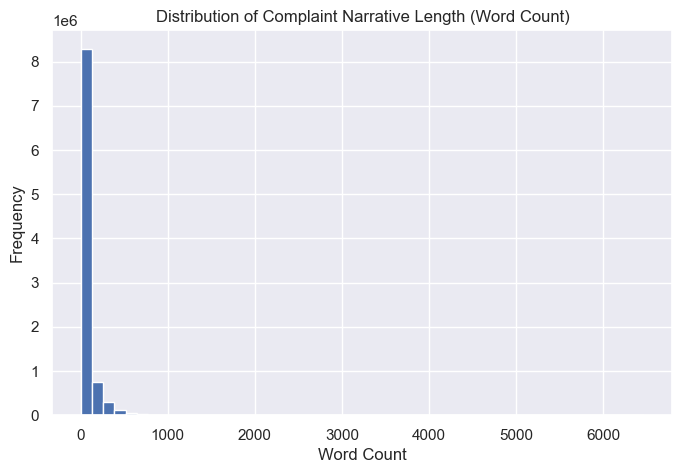

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df["word_count"], bins=50)
plt.title("Distribution of Complaint Narrative Length (Word Count)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


Filter to Required Products

In [16]:
target_products = [
    "Credit card",
    "Personal loan",
    "Savings account",
    "Money transfers"
]

df_filtered = df[df["Product"].isin(target_products)]

df_filtered["Product"].value_counts()


Product
Credit card        226686
Money transfers      5354
Name: count, dtype: int64

In [17]:
df_filtered = df_filtered[
    df_filtered["Consumer complaint narrative"].notna()
]

df_filtered.shape


(82164, 19)

Clean Complaint Narratives (Text Preprocessing)

In [18]:
def clean_text(text):
    text = text.lower()
    
    # remove boilerplate phrases
    boilerplate_patterns = [
        r"i am writing to file a complaint",
        r"this complaint is regarding",
        r"i would like to file a complaint"
    ]
    for pattern in boilerplate_patterns:
        text = re.sub(pattern, "", text)
    
    # remove special characters
    text = re.sub(r"[^a-z\s]", " ", text)
    
    # normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

df_filtered["clean_narrative"] = df_filtered[
    "Consumer complaint narrative"
].apply(clean_text)

df_filtered[["Consumer complaint narrative", "clean_narrative"]].head()


,Consumer complaint narrative,clean_narrative
12237,A XXXX XXXX card was opened under my name by a...,a xxxx xxxx card was opened under my name by a...
13280,"Dear CFPB, I have a secured credit card with c...",dear cfpb i have a secured credit card with ci...
13506,I have a Citi rewards cards. The credit balanc...,i have a citi rewards cards the credit balance...
13955,b'I am writing to dispute the following charge...,b i am writing to dispute the following charge...
14249,"Although the account had been deemed closed, I...",although the account had been deemed closed i ...


Save Final Dataset

In [20]:
final_columns = [
    "Product",
    "clean_narrative",
    "word_count"
]

df_filtered[final_columns].to_csv(
    "../data/processed/cleaned_complaints.csv",
    index=False
)
